# K Means

1. Randomly placing *k* centroids, one for each cluster
2. Calculate the distance of each point from each centroid
2. Assign each data point (object) to its closest centroid, creating a cluster
4. Recalculate the position of the *k* centroids
5. Repeat the stepd 2 - 4, until the centroids no longer move

* Partitioning Clustering
* K-Means divides the data into non - overlaping subsets (clusters) without any cluster - internal structure
* Examples within a cluster are very similar
* Examples across differente cluster are very different

Determine the similarity and dissimilarity
* *Intra - cluster* distances are minimized
* *Inter - cluster* distances are maximized

Algorithm process
1- Initialize centroids randomly
2. Distance calculation
3. Assign each point to the closest centroid
  * SSE = the sum of the squared difference between each point and its centroid 
  $SSe = \sum_{1}^{n}{(x_i - C_j)^2}$
4. Compute the new centroids for each cluster
5. Repeat unitl there are no more changes


K - Means Accuracy
* External approach
  * compare the clusters with the ground trth, if is available
* Internal approach
  * Average the distance between data points within a cluster


* Med and Large sized databases (Relatively efficient)
* Produces sphere - like cluster
* Needs number of clusters

In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import pandas as pd
%matplotlib inline

**K - Means on a randomly generated dataset**

In [ ]:
np.random.seed(10)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

Input

* n_samples: The total number of points equally divided among clusters.
  * Value will be: 5000
* centers: The number of centers to generate, or the fixed center locations.
  * Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
* cluster_std: The standard deviation of the clusters.
  * Value will be: 0.9

Output
* X: Array of shape [n_samples, n_features]. (Feature Matrix)
  * The generated samples.
* y: Array of shape [n_samples]. (Response Vector)
  * The integer labels for cluster membership of each sample.

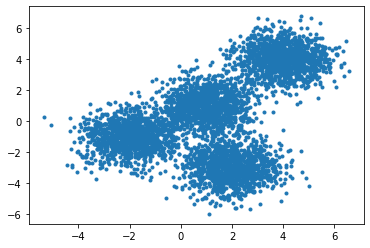

In [ ]:
X, y = make_blobs(n_samples = 5000, centers = [[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std = 0.9)
plt.scatter(X[:, 0], X[:, 1], marker = ".")

The KMeans class has many parameters that can be used, but we will be using these three:

* init: Initialization method of the centroids.
  * Value will be: "k-means++"
  * k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
* n_clusters: The number of clusters to form as well as the number of centroids to generate.
  * Value will be: 4 (since we have 4 centers)
* n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
  * Value will be: 12

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means.fit(X)


KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 3, ..., 3, 1, 2], dtype=int32)

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.98062775, -0.99398599],
       [ 1.03752528,  1.04193643],
       [ 3.99610376,  4.02734972],
       [ 1.97744971, -3.01026713]])

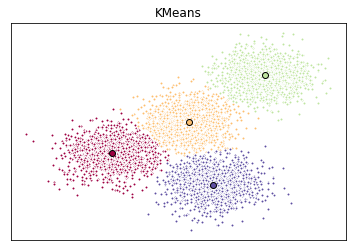

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


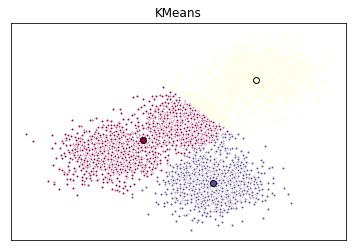

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

**Customer Segmentation with K-means**


Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources.
For example, **one group might contain customers who are high-profit and low-risk**, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. **Another group might include customers from non-profit organizations and so on**

In [ ]:
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2021-11-16 19:07:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.001s  

2021-11-16 19:07:26 (32.1 MB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [ ]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

The dataset have missin values in the column "Defaulted"
we need to replace those values

In [ ]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [ ]:
print("The different values of Defaulted are: {}".format(df["Defaulted"].unique()))
common_defaulted = df["Defaulted"].value_counts().idxmax()
print("the most common value is: {}".format(common_defaulted))

The different values of Defaulted are: [ 0.  1. nan]
the most common value is: 0.0


The column "Defaulted" has to differente values  {0, 1}
we can not change those values with median, mean, mode

We change by frecuency, the value 0.0 is the most frecuent type, so all the column that have NaN is going to be replace by 0

In [ ]:
df["Defaulted"].replace(np.nan, common_defaulted, inplace = True)

In [ ]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [ ]:
df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

the columns "Customer Id" & "Address" do not provide revelant data, so we drop those columns and the new dataframe "df_features" only have the features for the model development

In [ ]:
df_features = df.drop(columns = ["Customer Id", "Address"], axis = 1)

In [ ]:
df_features.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

**Normalize the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard = StandardScaler()

#
X = np.asanyarray(df_faetures)
X_standard = standard.fit_transform(X)

In [ ]:
X_standard

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

**Modeling**

In [ ]:
Num_cluster = 3
k_means = KMeans(init = "k-means++", n_clusters = Num_cluster, n_init = 12)

k_means.fit(X)
labels = k_means.labels_
cluster_center = k_means.cluster_centers_

print("the algorithm labels: {}".format(np.unique(labels)))
print("The centroid of each cluster: \n{}".format(cluster_center))

the algorithm labels: [0 1 2]
The centroid of each cluster: 
[[3.29645609e+01 1.61479199e+00 6.37442219e+00 3.11648690e+01
  1.03254083e+00 2.10413251e+00 2.37288136e-01 1.00947612e+01]
 [4.53888889e+01 2.66666667e+00 1.95555556e+01 2.27166667e+02
  5.67844444e+00 1.09071667e+01 2.22222222e-01 7.32222222e+00]
 [4.13333333e+01 1.95628415e+00 1.52568306e+01 8.39289617e+01
  3.10363934e+00 5.76527869e+00 1.36612022e-01 1.07245902e+01]]


**Insights**

In [ ]:
df_features["Clus-km"] = labels
df_features.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus-km
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,2
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


we can easily check the centroid values by averaging the features in each cluster

In [ ]:
df_features.groupby("Clus-km").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus-km,,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.237288,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.222222,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.136612,10.724590


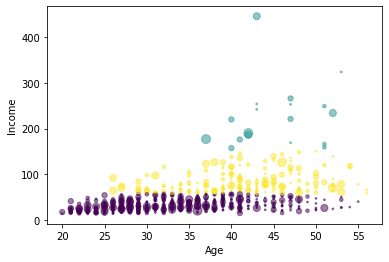

In [ ]:
area = np.pi * (X[:, 1]) ** 2
plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Income")

plt.show()

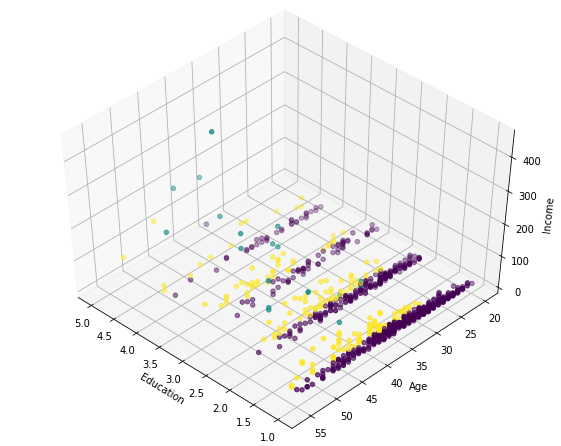

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME